<a href="https://www.kaggle.com/code/sharmageetika/stock-analysis-rsi?scriptVersionId=92903626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-data-set-20022022/NFLX.csv


In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import datetime as dt

In [4]:
dataframe=pd.read_csv("../input/netflix-stock-price-data-set-20022022/NFLX.csv")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
#checking for missing data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4945 non-null   object 
 1   Open       4945 non-null   float64
 2   High       4945 non-null   float64
 3   Low        4945 non-null   float64
 4   Close      4945 non-null   float64
 5   Adj Close  4945 non-null   float64
 6   Volume     4945 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 270.6+ KB


In [6]:

dataframe['Year'] = pd.DatetimeIndex(dataframe['Date']).year
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002


In [7]:
px.line(dataframe,x='Date',y='Open',title = 'Opening Price History',width=1000, height=600)




In [8]:

px.line(dataframe,x='Date',y='Close',title ='Close Price History',width=1000, height=600)

In [9]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles=('Highest Stock price for the day','','Lowest stock price for the day'))
fig.add_trace(go.Scatter(x=dataframe.Date, y =dataframe.High,name='High'), row = 1, col = 1)
fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe.Low, name='Low'), row =2, col = 1)
fig.update_layout(height = 900, width = 1800)
fig.show()

In [10]:
fig = px.line(dataframe, x='Date', y='Volume', title = 'Number of shares traded')
fig.show()

In [11]:
netflix_year= dataframe.groupby('Year')["Volume"].sum()
fig = px.bar(netflix_year, y ='Volume', title = 'Number of shares traded per year', color = 'Volume')
fig.show()

**[Relative Strength Index(RSI)](https://medium.com/@GeetikaSh/create-moving-average-and-rsi-features-to-predict-market-status-price-movement-19ef7c99f3a1]):**

In [12]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002


In [13]:
delta=dataframe['Adj Close'].diff(1)
delta.dropna(inplace=True)

positive=delta.copy()
negative=delta.copy()

positive[positive<0]=0
negative[negative>0]=0

In [14]:
days= 14

avg_gain=positive.rolling(window=days).mean() #take past 14 days and calgulate mean everytime
avg_loss=abs(negative.rolling(window=days).mean()) # as we don't want negative value here
RS=avg_gain/avg_loss #Relative Strength
RSI=100-(100/(1+RS))

In [15]:
combine=pd.DataFrame()
combine['Date']=dataframe['Date']
combine['Adj Close']=dataframe['Adj Close']
combine['RSI']=RSI



In [16]:
combine.head(25)

,Date,Adj Close,RSI
0,2002-05-23,1.196429,NaN
1,2002-05-24,1.210000,NaN
2,2002-05-28,1.157143,NaN
3,2002-05-29,1.103571,NaN
4,2002-05-30,1.071429,NaN
5,2002-05-31,1.076429,NaN
6,2002-06-03,1.128571,NaN
7,2002-06-04,1.117857,NaN
8,2002-06-05,1.147143,NaN
9,2002-06-06,1.182143,NaN


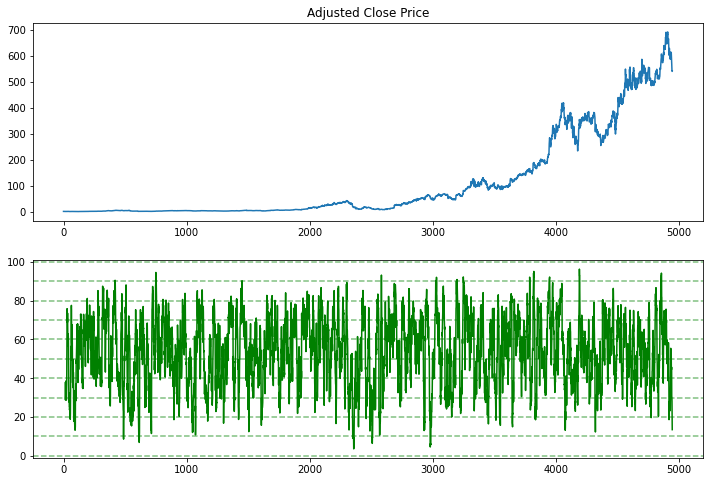

In [17]:

plt.figure(figsize=(12,8))
ax1=plt.subplot(211)
ax1.plot(combine.index,combine['Adj Close'])
ax1.title.set_text("Adjusted Close Price")
ax1.set_axisbelow(True)
ax2=plt.subplot(212,sharex=ax1)
ax2.plot(combine.index,combine['RSI'],color='green')
ax2.axhline(0,linestyle="--",alpha=0.5,color="green")
ax2.axhline(10,linestyle="--",alpha=0.5,color="green")
ax2.axhline(20,linestyle="--",alpha=0.5,color="green")
ax2.axhline(30,linestyle="--",alpha=0.5,color="green")
ax2.axhline(40,linestyle="--",alpha=0.5,color="green")
ax2.axhline(50,linestyle="--",alpha=0.5,color="green")
ax2.axhline(60,linestyle="--",alpha=0.5,color="green")
ax2.axhline(70,linestyle="--",alpha=0.5,color="green")
ax2.axhline(80,linestyle="--",alpha=0.5,color="green")
ax2.axhline(90,linestyle="--",alpha=0.5,color="green")
ax2.axhline(100,linestyle="--",alpha=0.5,color="green")



In [18]:

fig = make_subplots(rows = 2, cols = 2, subplot_titles=('Adjusted Close Price','','RSI'))
ax1=fig.add_trace(go.Scatter(x=combine.Date, y =combine['Adj Close'],name='Adjusted Close Price'), row = 1, col = 1)
ax2=fig.add_trace(go.Scatter(x=combine.Date, y=combine['RSI'], name='RSI'), row =2, col = 1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green")
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="green")
fig.show()


If RSI>70: Sell\
If RSI<30: Buy